In [1]:
import pandas as pd
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from scipy.stats import linregress

In [3]:
data = pd.read_csv("last_6 _recessions.csv")
data

,Name,Start,End,Duration (month),Time Since Last (month),Unemployment,GDP decline (%),Basic Notes
0,COVID 19,Feb-2020,Apr-2020,2,128,14.70%,-19.2,The outbreak of COVID-19 in November 2019 forc...
1,GFC,Dec-2007,Jun-2009,18,73,10.00%,-5.1,The subprime mortgage crisis led to the collap...
2,Dot Com - (9-11 attack),Mar-2001,Nov-2001,8,120,6.30%,-0.3,The 1990s were the longest period of economic ...
3,Early 1990s,Jul-1990,Mar-1991,8,92,7.80%,-1.4,Inflation began to increase and the Federal Re...
4,Early 1980s - Part 1,Jul-1981,Nov-1982,16,12,10.80%,-2.7,The Iranian Revolution sharply increased the p...
5,Early 1980s - Part 2,Jan-1980,Jul-1980,6,58,7.80%,-2.2,The NBER considers a very short recession to h...


###### compare the duration

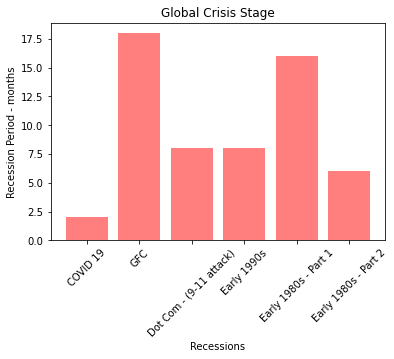

In [5]:
x_axis = data["Name"]
y_axis = data["Duration (month)"]
tick_locations = [value for value in x_axis]
plt.bar(x_axis, y_axis, color='r', alpha=.5, align="center")
plt.xticks(tick_locations, data["Name"], rotation=45 )
plt.xlabel("Recessions")
plt.ylabel("Recession Period - months")
plt.title("Global Crisis Stage")
plt.savefig("Recession period.png")
plt.show()

In [6]:
data['Unemployment'] = data['Unemployment'].replace("%", "",regex=True).astype("float")

<AxesSubplot:xlabel='Name'>

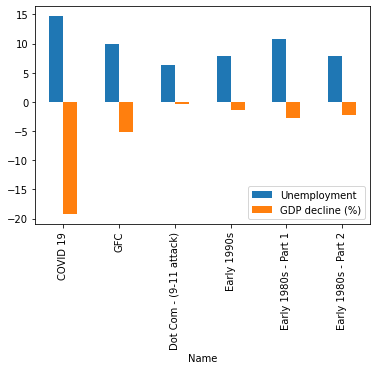

In [7]:
data.plot(kind='bar', x='Name', y=['Unemployment', 'GDP decline (%)'])

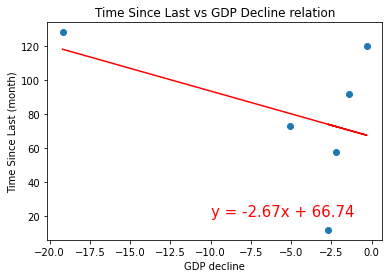

In [9]:
x_values = data['GDP decline (%)']
y_values = data['Time Since Last (month)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-10,20),fontsize=15,color="red")
plt.xlabel('GDP decline')
plt.ylabel('Time Since Last (month)')
plt.title('Time Since Last vs GDP Decline relation')
plt.savefig("GDP vs Time since last.png")
plt.show()

###### it is a negative relationship between GPD decline and number of months of recession. How long the recession lasts does not have a significant impact on the GDP decline. The inverse occurs when GDP falls, leading to less spending by businesses and consumers, which drives the markets lower; however, whether it's a bull market or bear market, the stock market has some level of impact, albeit indirectly, on GDP and the economy as a whole.

In [11]:
gdp_returns = pd.read_csv('GDP Growth and S&P 500 Returns.csv', skiprows = 2, encoding='cp1252')

gdp_returns

,Year,Real GDP Growth,Real S&P 500 Returns
0,1980,-0.30%,13.90%
1,1981,2.50%,-18.30%
2,1982,-1.80%,10.80%
3,1983,4.60%,13.40%
4,1984,7.20%,-2.50%
5,1985,4.20%,23.00%
6,1986,3.50%,12.90%
7,1987,3.50%,-2.20%
8,1988,4.20%,7.90%
9,1989,3.70%,22.40%


In [12]:
new_gdp_return = gdp_returns.rename(columns={"Year": "Year", "Real GDP Growth": "GDP_Growth", "Real S&P 500 Returns" : "S&P_500_Returns"})
new_gdp_return

,Year,GDP_Growth,S&P_500_Returns
0,1980,-0.30%,13.90%
1,1981,2.50%,-18.30%
2,1982,-1.80%,10.80%
3,1983,4.60%,13.40%
4,1984,7.20%,-2.50%
5,1985,4.20%,23.00%
6,1986,3.50%,12.90%
7,1987,3.50%,-2.20%
8,1988,4.20%,7.90%
9,1989,3.70%,22.40%


In [13]:
new_gdp_return.dtypes                                

Year                int64
GDP_Growth         object
S&P_500_Returns    object
dtype: object

In [14]:
#remove special characters
new_gdp_return['GDP_Growth'] = new_gdp_return['GDP_Growth'].replace("%", "",regex=True).astype("float")

In [15]:
new_gdp_return['S&P_500_Returns'] = new_gdp_return['S&P_500_Returns'].replace("%", "",regex=True).astype("float")

#### Real GDP Growth	Real S&P 500 Returns

The r-squared is: 0.00114477665735754


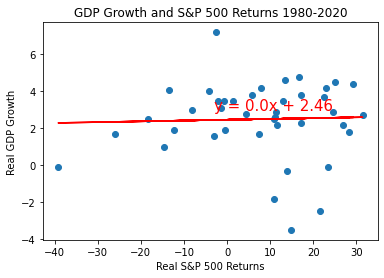

In [16]:
x_return = new_gdp_return['S&P_500_Returns']
y_gdp = new_gdp_return['GDP_Growth']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_return, y_gdp)
regress_values = x_return * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_return,y_gdp)
plt.plot(x_return,regress_values,"r-")
plt.annotate(line_eq,(-3,3),fontsize=15,color="red")
plt.xlabel('Real S&P 500 Returns')
plt.ylabel('Real GDP Growth')
plt.title('GDP Growth and S&P 500 Returns 1980-2020')
print(f"The r-squared is: {rvalue**2}")
plt.savefig("GDPvsS&P Returns.png")

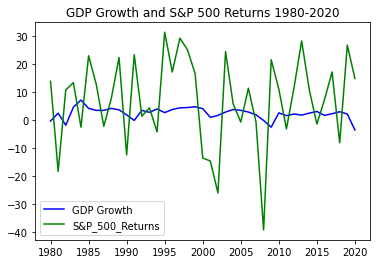

In [17]:
gdp = plt.plot(new_gdp_return['Year'], new_gdp_return['GDP_Growth'], color="blue", label="GDP Growth")
gdp = plt.plot(new_gdp_return['Year'], new_gdp_return['S&P_500_Returns'], color="green", label="S&P_500_Returns")
plt.legend()
plt.title('GDP Growth and S&P 500 Returns 1980-2020')
plt.savefig("GDPvsS&P Returns_line.png")
plt.show()